In [1]:
import oommfc as mc
import discretisedfield as df
import micromagneticmodel as mm
import random

random.seed(2) #Con esto aseguramos reprocudibilidad

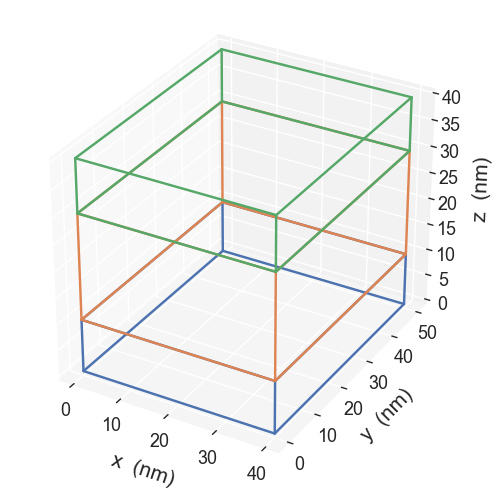

In [10]:
def subreg(xmin,xmax,ymin,ymax,zmin,zmax,subregions,i):
    p1 = (xmin, ymin, zmin)
    p2 = (xmax, ymax, zmax)
    region1 = df.Region(p1=p1, p2=p2)
    r='r{}'.format(i)
    subregions[r] = region1
    return subregions



def reg(xminr,yminr,zminr,xmaxr,ymaxr, espesor_ferromagnetico, espesor_no_magnetico):
    
    #Para la region 1
    xmin1=xminr
    ymin1=yminr
    zmin1=zminr
    
    xmax1=xmaxr
    ymax1=ymaxr
    zmax1=espesor_ferromagnetico 
    
    #Para la region 2
    xmin2=xminr
    ymin2=yminr
    zmin2=zmax1 
    
    xmax2=xmaxr
    ymax2=ymaxr
    zmax2=zmin2 + espesor_no_magnetico
    
    #Para la region 3
    
    xmin3=xminr
    ymin3=yminr
    zmin3=zmax2
    
    xmax3=xmaxr
    ymax3=ymaxr
    zmax3=zmin3 + espesor_ferromagnetico
    zmaxr=zmax3
    
     
    #defino una lista vacia para las subregiones
    subregions={}
    
    subregions=subreg(xmin1,xmax1,ymin1,ymax1,zmin1,zmax1,subregions,1)
    
    subregions=subreg(xmin2,xmax2,ymin2,ymax2,zmin2,zmax2,subregions,2)
    
    subregions=subreg(xmin3,xmax3,ymin3,ymax3,zmin3,zmax3,subregions,3)
    
    n=(int(xmaxr*1e8),int(ymaxr*1e8),int(zmaxr*1e8))
    
    mesh = df.Mesh(p1=(xminr, yminr, zminr), p2=(xmaxr, ymaxr, zmaxr),n=n, subregions=subregions)
    return mesh,subregions
 
    
    
    
#Parametros de la region en general
xminr=0
yminr=0
zminr=0

xmaxr=4e-8
ymaxr=5e-8


mesh,subregions=reg(xminr,yminr,zminr,xmaxr,ymaxr,1e-8,2e-8)
mesh.slider("x", description="my slider")
mesh.mpl_subregions()


In [11]:
subregions

{'r1': Region(p1=(0, 0, 0), p2=(4e-08, 5e-08, 1e-08)),
 'r2': Region(p1=(0, 0, 1e-08), p2=(4e-08, 5e-08, 3.0000000000000004e-08)),
 'r3': Region(p1=(0, 0, 3.0000000000000004e-08), p2=(4e-08, 5e-08, 4e-08))}

Ahora, quiero ponerle propiedades a mis regiones metalicas

In [19]:
system = mm.System(name='rkky')
system.energy = (mm.Exchange(A=1e-12) +
                 mm.RKKY(sigma=-1e-4, sigma2=0, subregions=['r1', 'r3']) +
                 mm.UniaxialAnisotropy(K=1e5, u=(1, 0, 0)))

norm = {'r1': 2e6, 'r3': 2e6, 'r2': 0}
system.m = df.Field(mesh, dim=3, value=lambda point: [2*random.random()-1 for i in range(3)],norm=norm)

The initial megnetisation is

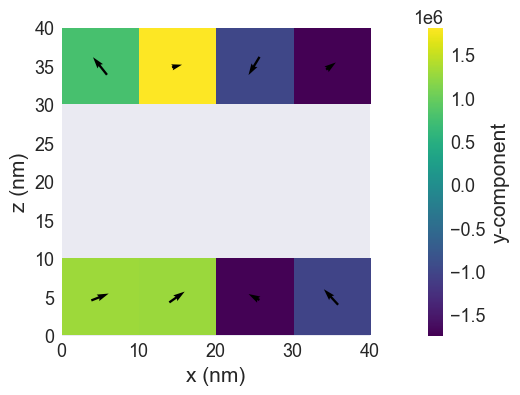

In [20]:
system.m.plane('y').mpl(figsize=(15, 4))

Ecuacion de energia:

Ahora podemos relajar el sistema y graficar su magnetizacion

In [15]:
md = mc.MinDriver()
md.drive(system)


Running OOMMF (ExeOOMMFRunner)[2022/09/08 22:51]... (14.7 s)


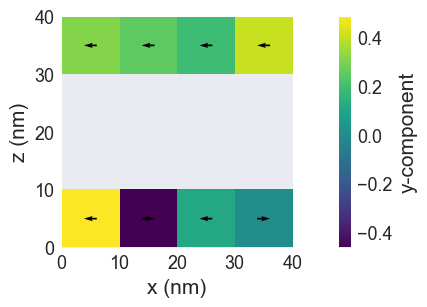

In [16]:
system.m.plane('y').mpl(figsize=(12, 3))

In [14]:
system.energy

Exchange(A=1e-12) + RKKY(sigma=-0.0001, sigma2=0, subregions=['r1', 'r3']) + UniaxialAnisotropy(K=100000.0, u=(1, 0, 0))